In [2]:
import pandas as pd
import numpy as np
import random as rnd
import re

# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# machine learning
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

from sklearn import linear_model


import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model


In [3]:
df_data = pd.read_csv('customer_churn.csv')

In [4]:
df_data.columns = ['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan', 'Vmail_Plan', 'VMail_Message', 'Day_Mins',
                  'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
                  'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn']

In [5]:
df_data.describe()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Half of the clients remain in the company for more than 101 months

The average total revenue generated per customer(Day + Night + Eve + Intl Charge) is 67.49

Each customer had an average 305 calls (Day + Night + Eve + Intl Calls) in the course of using the service of this company

Half of the clients has called the customer service at least one time

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account_Length    3333 non-null int64
Area_Code         3333 non-null int64
Phone             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
VMail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Mins          3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Mins        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Mins         3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


#### We can see that there are no missing values. We can drop the phone number and area code columns as they contain each customer's unique phone number and it's not going to be useful in the analysis.

In [8]:
df_data = df_data.drop(['Area_Code','Phone'],axis=1)

#### n the given dataset, we have two types of customers one who is likely to be loyal and another who is likely to be disloyal . So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [9]:
df_data.groupby('Churn').mean()

,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
Churn,,,,,,,,,,,,,,,
False.,100.793684,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True.,102.664596,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [11]:
df_data.groupby('Churn').size()

Churn
False.    2850
True.      483
dtype: int64

([<matplotlib.patches.Wedge at 0x217726aa400>,
 [Text(0.5276375525199629, 1.0777748434486414, 'False.'),
  Text(-0.48366780272639004, -0.987960250519132, 'True.')],
 [Text(0.30778857230331164, 0.6287019920117075, '85.5%'),
  Text(-0.2638188014871218, -0.538887409374072, '14.5%')])

Text(0.5, 1.0, 'Percent of churn in customer')

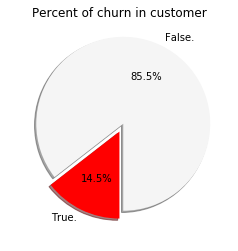

In [13]:
labels = df_data['Churn'].value_counts(sort = True).index
sizes = df_data['Churn'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 4,4
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

#### The class for churn is only around 15% of the total population of samples. There is a real risk that a model trained on this data may only make too many predictions in favour of the majority class.

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Total account length by customers in each state')

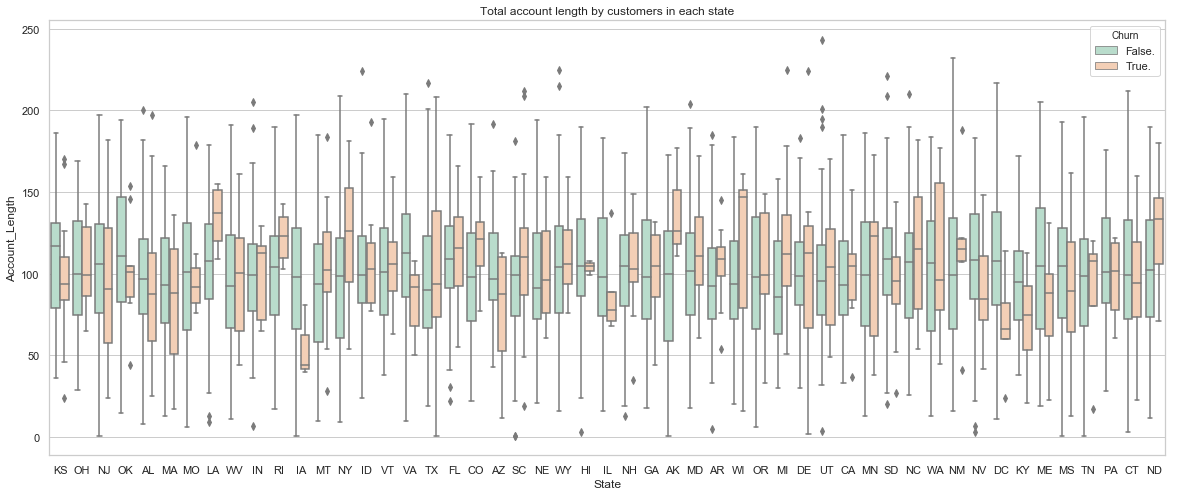

In [25]:
plt.figure(figsize = (20,8))

sns.set(style = 'whitegrid')
sns.boxplot(x = df_data.State, y = df_data.Account_Length, hue = df_data.Churn,palette = "Pastel2")

plt.title('Total account length by customers in each state')

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Total customers in each state')

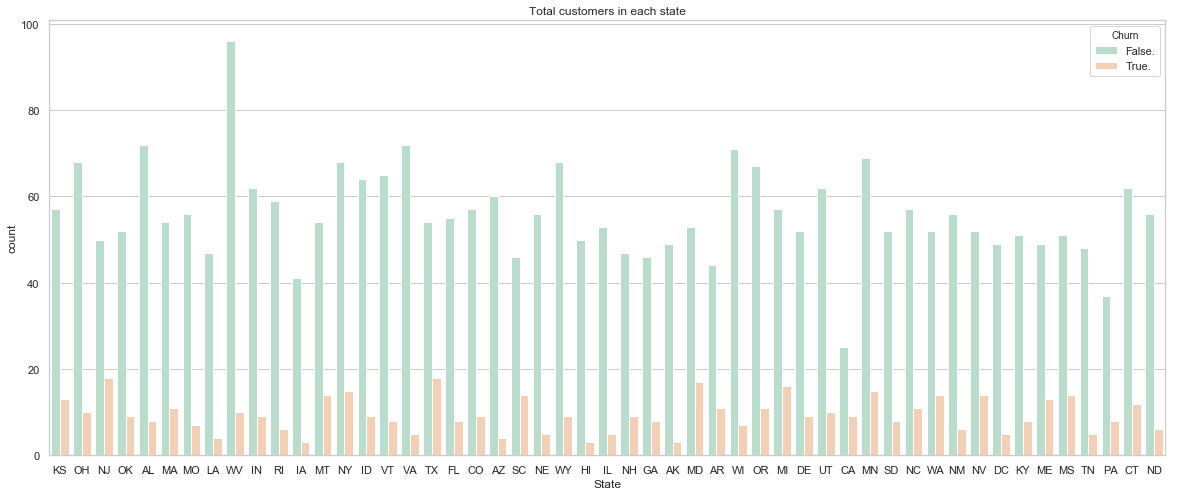

In [26]:
plt.figure(figsize = (20,8))
sns.set(style = 'whitegrid')
sns.countplot(df_data.State, hue = df_data.Churn,palette = "Pastel2" )
plt.title('Total customers in each state')

#### There is no evident relationship between different states and the customer's leave. We can drop this column too.

In [37]:
df_data = df_data.drop(['State'],axis=1)

#### Converting categorical data

In [32]:
df_data.replace({'Churn': {'False.': 0, 'True.': 1}}, inplace=True)
df_data.replace({'Intl_Plan': {'no': 0, 'yes': 1}}, inplace=True)
df_data.replace({'Vmail_Plan': {'no': 0, 'yes': 1}}, inplace=True)

In [34]:
# df_data.replace({'State': {'AK':1, 'AL':2, 'AR':3, 'AZ':4, 'CA':5, 'CO':6, 'CT':7, 'DC':8, 'DE':9, 'FL':10, 'GA':11, 'HI':12,
#                          'IA':13, 'ID':14, 'IL':15, 'IN':16, 'KS':17, 'KY':18, 'LA':19, 'MA':20, 'MD':21, 'ME':22, 'MI':23, 
#                          'MN':24, 'MO':25, 'MS':26, 'MT':27, 'NC':28, 'ND':29, 'NE':30, 'NH':31, 'NJ':32, 'NM':33, 'NV':34,
#                          'NY':35, 'OH':36, 'OK':37, 'OR':38, 'PA':39, 'RI':40, 'SC':41, 'SD':42, 'TN':43, 'TX':44, 'UT':45,
#                          'VA':46, 'VT':47, 'WA':48, 'WI':49, 'WV':50, 'WY':51}}, inplace=True)

In [38]:
df_data.head()

,Account_Length,Intl_Plan,Vmail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,CustServ_Calls,Churn
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


<Figure size 648x648 with 0 Axes>

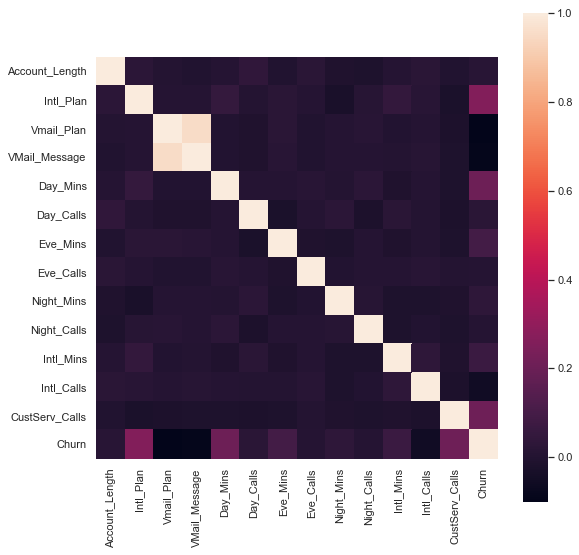

In [39]:
## Check overall correlation
cor = df_data.corr()
plt.figure(figsize = (9,9))
sns.heatmap(cor, square = True) 
## Similar as common sense, call minutes has correlation with charge

#### From the colored correlation matrix generated above, we can see that the 4 variables  'Day Charge','Night Charge','Eve Charge' and 'Intl charge' that have been calculated directly from the number of minutes spent on phone calls (Day Mins,night mins,evening minutes, international minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. We can drop them from our analysis.
#### Also Vmail Plan and Vmail messages are also corelated to each other but not to Churn.

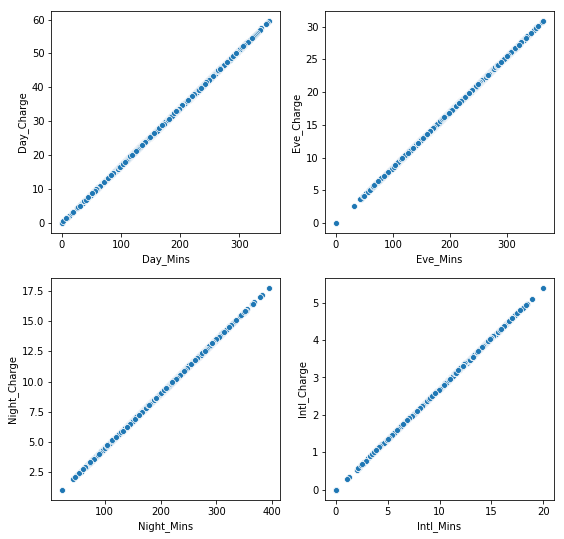

In [20]:
## To double check, scatterplot the minutes and the charge
f, ([(ax1, ax2), (ax3, ax4)]) = plt.subplots(2,2, figsize=(9,9))
sns.scatterplot(df_data['Day_Mins'], df_data['Day_Charge'], ax=ax1)
sns.scatterplot(df_data['Eve_Mins'], df_data['Eve_Charge'], ax=ax2)
sns.scatterplot(df_data['Night_Mins'], df_data['Night_Charge'], ax=ax3)
sns.scatterplot(df_data['Intl_Mins'], df_data['Intl_Charge'], ax=ax4)
## They are highly correlated

#### As from above scatter plot it is confirmed that the Charge is related to respective Mins. So we will drop the columns Day_Charge, Night_Charge, Eve_Charge, Intl_Charge

In [21]:
df_data = df_data.drop(columns=['Day_Charge', 'Eve_Charge','Night_Charge', 'Intl_Charge'])

In [41]:
df_data[(df_data.Vmail_Plan == 0) & (df_data.VMail_Message > 0)]

,Account_Length,Intl_Plan,Vmail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,CustServ_Calls,Churn


#### We can see that VMail Message is greater than 0 only if Vmail Plan is True. Hence we can drop Vmail Plan.

In [42]:
df_data = df_data.drop(columns=['Vmail_Plan'])

<Figure size 576x576 with 0 Axes>

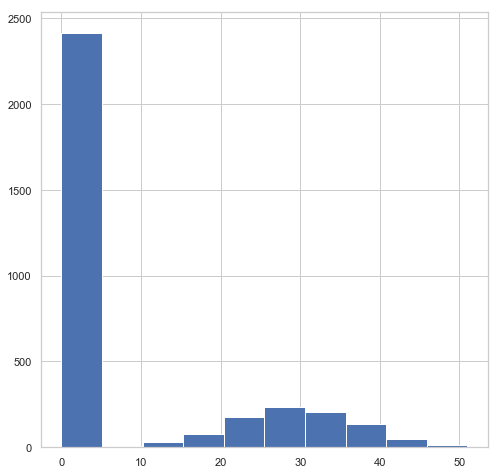

In [45]:
plt.figure(figsize = (8,8))
df_data['VMail_Message'].hist()

<Figure size 576x576 with 0 Axes>

(5, 55)

<Figure size 576x576 with 0 Axes>

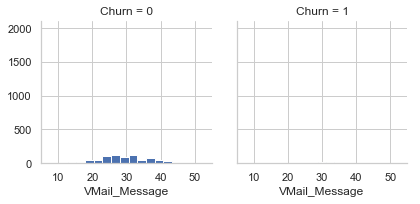

In [47]:
g = sns.FacetGrid(df_data, col='Churn')
g.map(plt.hist, 'VMail_Message', bins=20)
plt.xlim(xmin=5, xmax = 55)

#### As we can see in the distribution of the Voicemail messages, most of the customers have no voicemail messages. and there is no relationship between voicemail messages and churn. We can drop this column also.

In [57]:
df_data = df_data.drop(columns=['VMail_Message'])

Text(0.5, 1.0, 'Total calls data')

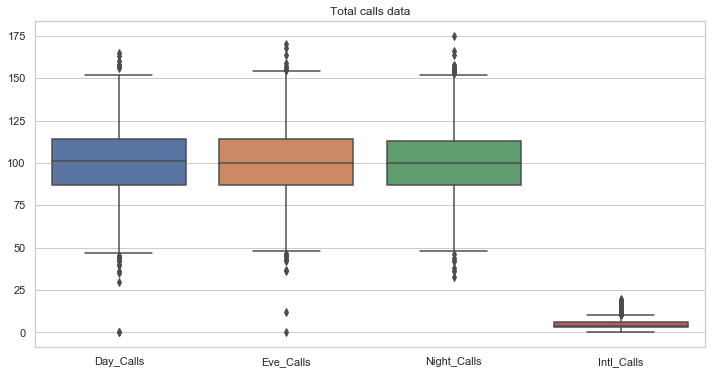

In [52]:
features=[ 'Day_Calls','Eve_Calls','Night_Calls', 'Intl_Calls']
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_data[features], ax=ax);
plt.title('Total calls data')

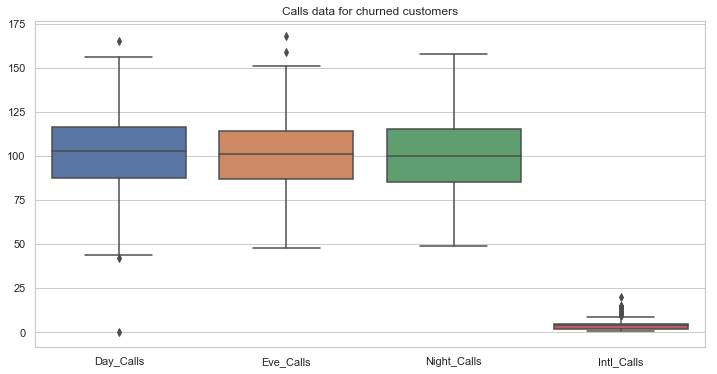

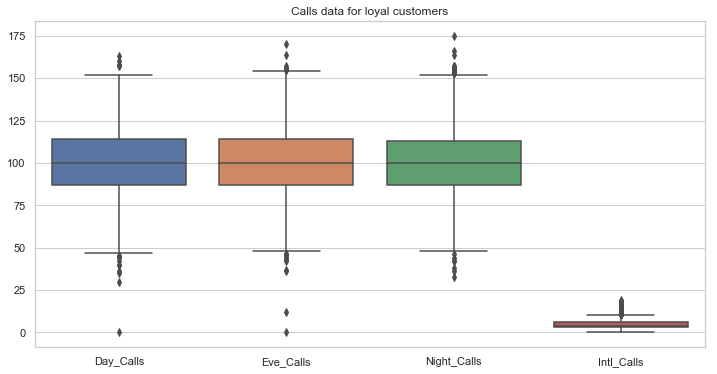

In [53]:
df_churn = df_data[df_data.Churn == 1]
df_nochurn = df_data[df_data.Churn == 0]
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_churn[features], ax=ax)
plt.title('Calls data for churned customers');
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_nochurn[features], ax=ax)
plt.title('Calls data for loyal customers');

#### So we can see above that the mean number of calls for all the times i.e Day, Evening, Night, International is almost same for Churned and loyal customers. Also logically we know that one call can last any number of minutes. Since we already have the total minutes  in every category we will drop the columns Day_Calls, Night_Calls, Eve_Calls and Intl_Calls

In [54]:
df_data = df_data.drop(columns=['Day_Calls', 'Eve_Calls','Night_Calls', 'Intl_Calls'])

In [58]:
df_data.head()

,Account_Length,Intl_Plan,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn
0,128,0,265.1,197.4,244.7,10.0,1,0
1,107,0,161.6,195.5,254.4,13.7,1,0
2,137,0,243.4,121.2,162.6,12.2,0,0
3,84,1,299.4,61.9,196.9,6.6,2,0
4,75,1,166.7,148.3,186.9,10.1,3,0


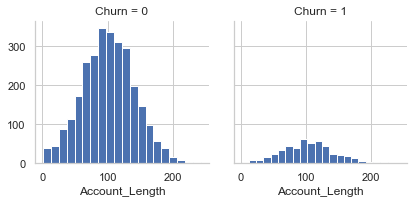

In [60]:
g = sns.FacetGrid(df_data, col='Churn')
g.map(plt.hist, 'Account_Length', bins=20)

We can see that the distribution of the Account Length of customers that left or were loyal are somehow similar. The frequency of the customers who left are less than loyal customers and that's the reason why the bins are shorter in right histogram above. Most of the customers stayed with the company between 60 to 120 months.

,Account_Length,Intl_Plan,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn
Account_Length,1.000000,0.024735,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541
Intl_Plan,0.024735,1.000000,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852
Day_Mins,0.006216,0.049396,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151
Eve_Mins,-0.006757,0.019100,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796
Night_Mins,-0.008955,-0.028905,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493
Intl_Mins,0.009514,0.045871,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239
CustServ_Calls,-0.003796,-0.024522,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750
Churn,0.016541,0.259852,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000


<Figure size 648x648 with 0 Axes>

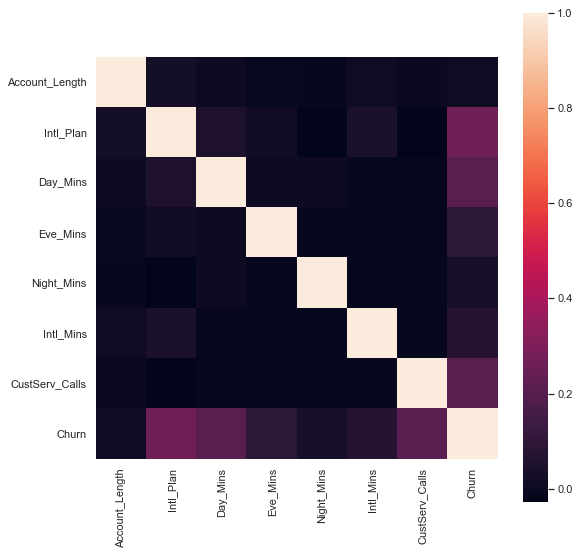

In [61]:
# Lets check corelation one more time
cor = df_data.corr()
cor
plt.figure(figsize = (9,9))
sns.heatmap(cor, square = True) 

In [62]:
#Drop Account Length?

In [68]:
# Lets check if Intl_Plan and Intl_Mins are related
df_data[(df_data.Intl_Plan == 0) & (df_data.Intl_Mins > 0)].count()

Account_Length    2992
Intl_Plan         2992
Day_Mins          2992
Eve_Mins          2992
Night_Mins        2992
Intl_Mins         2992
CustServ_Calls    2992
Churn             2992
dtype: int64

#### So even though if the customer doesn't have International plan he may have International call minutes

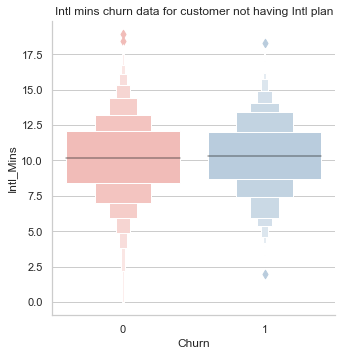

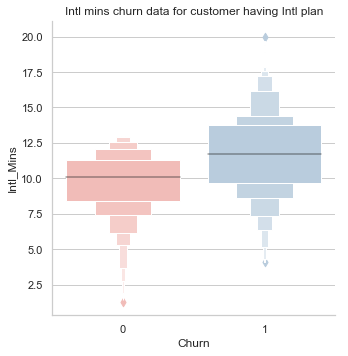

In [78]:
g = sns.factorplot(x="Churn", y = "Intl_Mins",data = df_data[df_data.Intl_Plan == 0], kind="boxen", palette = "Pastel1")
plt.title('Intl mins churn data for customer not having Intl plan');
g = sns.factorplot(x="Churn", y = "Intl_Mins",data = df_data[df_data.Intl_Plan == 1], kind="boxen", palette = "Pastel1")
plt.title('Intl mins churn data for customer having Intl plan');

For Customers having the International plan, people who have left have talked more. Since the International rate is higher their cost is higher.

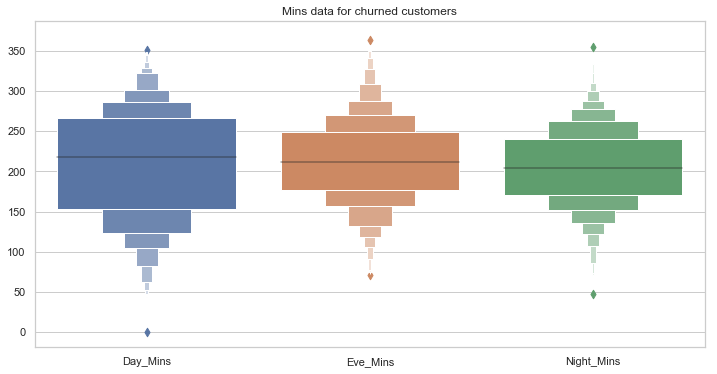

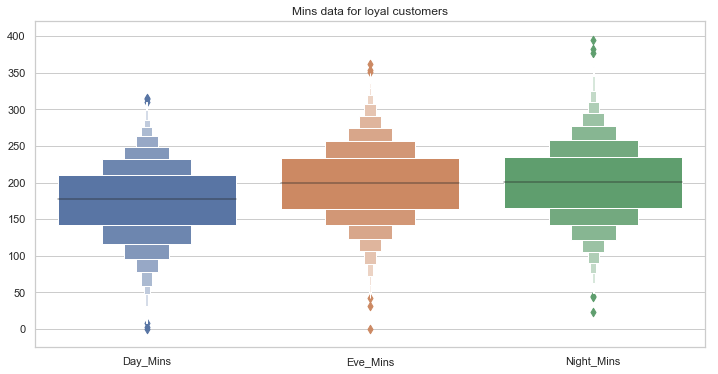

In [79]:
features=[ 'Day_Mins','Eve_Mins','Night_Mins']
df_churn = df_data[df_data.Churn == 1]
df_nochurn = df_data[df_data.Churn == 0]
_, ax = plt.subplots(figsize=(12, 6))
sns.boxenplot(data=df_churn[features], ax=ax)
plt.title('Mins data for churned customers');
_, ax = plt.subplots(figsize=(12, 6))
sns.boxenplot(data=df_nochurn[features], ax=ax)
plt.title('Mins data for loyal customers');

The customers who left talked more during the day and evening when the call rate is higher.

<Figure size 432x432 with 0 Axes>

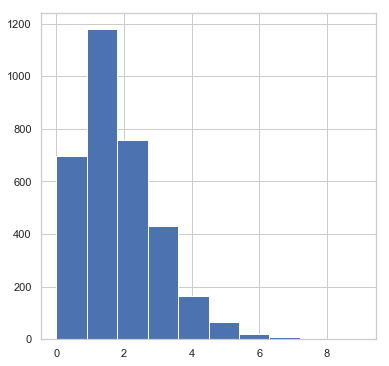

In [82]:
plt.figure(figsize = (6,6))
df_data['CustServ_Calls'].hist()

In [84]:
pd.crosstab(df_data.Churn, df_data.CustServ_Calls,margins = True)

CustServ_Calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


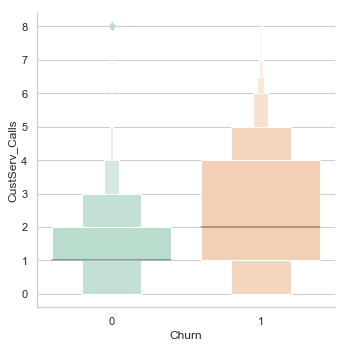

In [85]:
g = sns.factorplot(y="CustServ_Calls",x="Churn",data=df_data,kind="boxen", palette = "Pastel2")

most of the customers had at least one call to customer service

most of the customers who escaped had at leat one to four call to customer service.

So we can see that there is clearly an influence here.

In [90]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics

# One-third of data as a part of test set
array = df_data.values
X = array[:,0:7] # Features/Independent Variables
Y = array[:,7] # Response/Class Variable
validation_size = 0.3
scoring = 'accuracy'
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

train_size = len(X_train)
val_size = len(X_validation)
print(val_size)
print(train_size)

1000
2333


In [92]:
#KNN
## Since we have 11 features, start with the odd number closest to the root square of 11: 3
knn3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, Y_train)
pred_knn3 = knn3.predict(X_validation)
print("KNN Accuracy (N = 3):", knn3.score(X_validation, Y_validation))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

KNN Accuracy (N = 3): 0.84


In [93]:
## N = 5
knn5 = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, Y_train)
pred_knn5 = knn5.predict(X_validation)
print("KNN Accuracy (N = 5):", knn5.score(X_validation, Y_validation))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNN Accuracy (N = 5): 0.856


In [94]:
## N = 7
knn7 = neighbors.KNeighborsClassifier(n_neighbors = 7)
knn7.fit(X_train, Y_train)
pred_knn7 = knn7.predict(X_validation)
print("KNN Accuracy (N = 7):", knn7.score(X_validation, Y_validation))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

KNN Accuracy (N = 7): 0.864


In [95]:
#Model Performance
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_r_knn3 = model_selection.cross_val_score(knn3, X_train, Y_train, cv=kfold, scoring=scoring)
msg_knn3 = "%s: %f (%f)" % ('KNN3 accuracy', cv_r_knn3.mean(), cv_r_knn3.std())

cv_r_knn5 = model_selection.cross_val_score(knn5, X_train, Y_train, cv=kfold, scoring=scoring)
msg_knn5 = "%s: %f (%f)" % ('KNN5 accuracy', cv_r_knn5.mean(), cv_r_knn5.std())

cv_r_knn7 = model_selection.cross_val_score(knn7, X_train, Y_train, cv=kfold, scoring=scoring)
msg_knn7 = "%s: %f (%f)" % ('KNN7 accuracy', cv_r_knn7.mean(), cv_r_knn7.std())

print(msg_knn3)
print(msg_knn5)
print(msg_knn7)

KNN3 accuracy: 0.857685 (0.022824)
KNN5 accuracy: 0.873539 (0.020669)
KNN7 accuracy: 0.877831 (0.018964)


Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

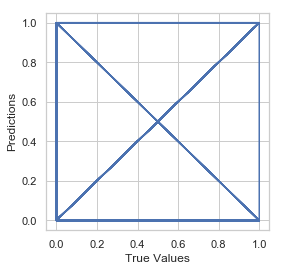

In [96]:
plt.plot(pred_knn7, Y_validation)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [99]:
clf = GaussianNB()
# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set
clf.fit(X_train, Y_train) #for the gaussian classifier

#Predicting for the Test(Validation) Set
pred_clf = clf.predict(X_validation)
clf.score(X_validation, Y_validation)

GaussianNB(priors=None, var_smoothing=1e-09)

0.838

In [98]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print(msg)

NB accuracy: 0.844389 (0.017203)


In [120]:
from sklearn import tree
import graphviz

tree1 = tree.DecisionTreeClassifier()
# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set
tree1.fit(X_train, Y_train) 

#Predicting for the Test(Validation) Set
pred_tree = tree1.predict(X_validation)
tree1.score(X_validation, Y_validation)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.875

In [115]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results = model_selection.cross_val_score(DecisionTreeClassifier(), X, Y, cv=10, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print(msg)
cv_results

NB accuracy: 0.884785 (0.015042)


array([0.90419162, 0.88023952, 0.88023952, 0.87687688, 0.90690691,
       0.88588589, 0.87087087, 0.85585586, 0.88588589, 0.9009009 ])

In [116]:
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)
decisionTree = decisionTree.fit(train_x, train_y)

In [122]:
# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(tree1, out_file=None, 
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
graph.render('decision_tree1.gv', view=True)


CalledProcessError: Command '['dot.bat', '-Tpdf', '-O', 'decision_tree1.gv']' returned non-zero exit status 1.